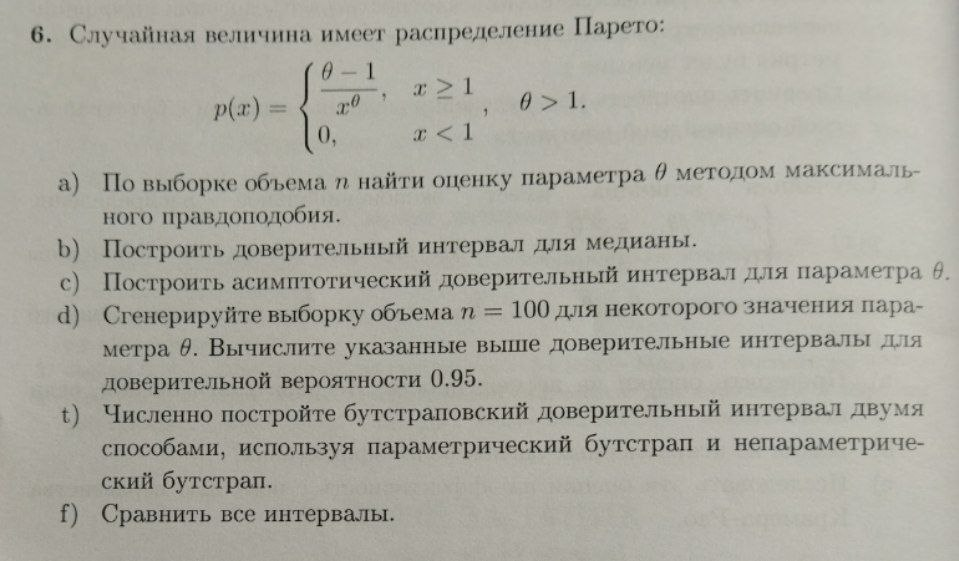

In [2]:
from IPython.display import Image

Image("images/photo_5350494331657645199_y.jpg")

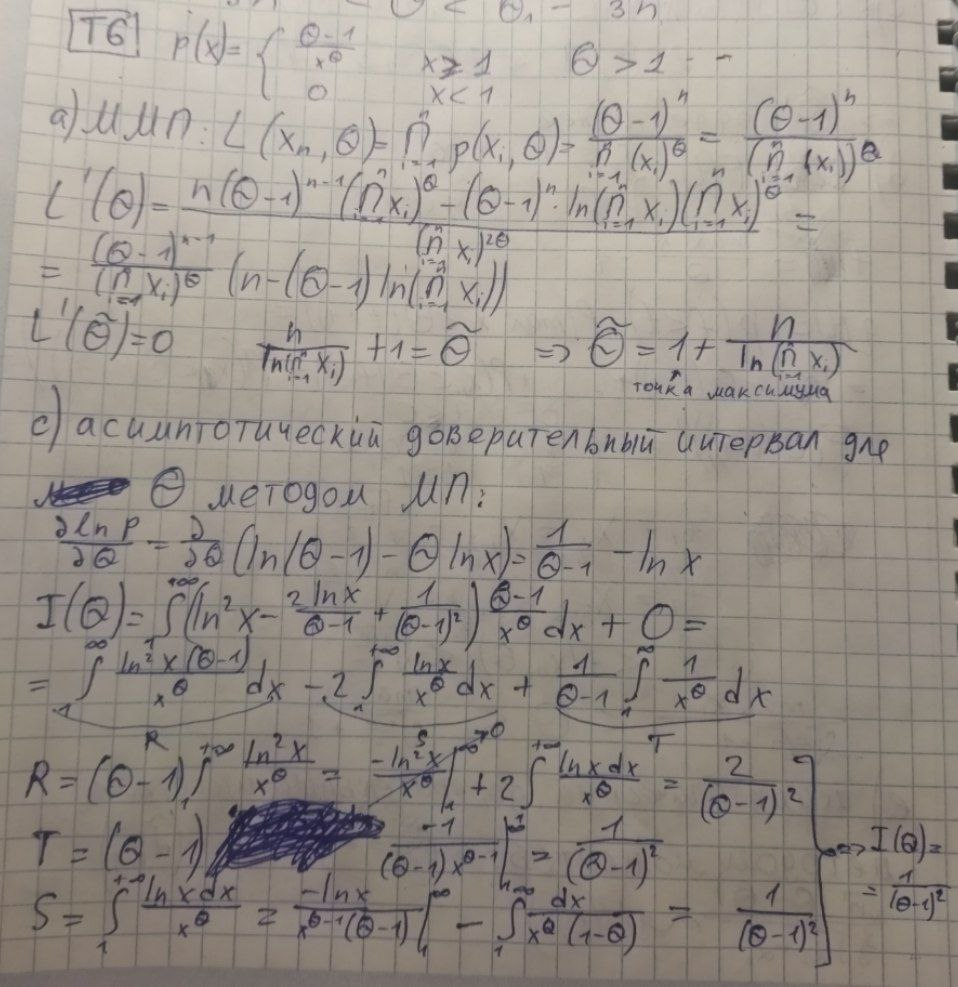

In [3]:
Image("images/photo_5406847798684545536_y.jpg")

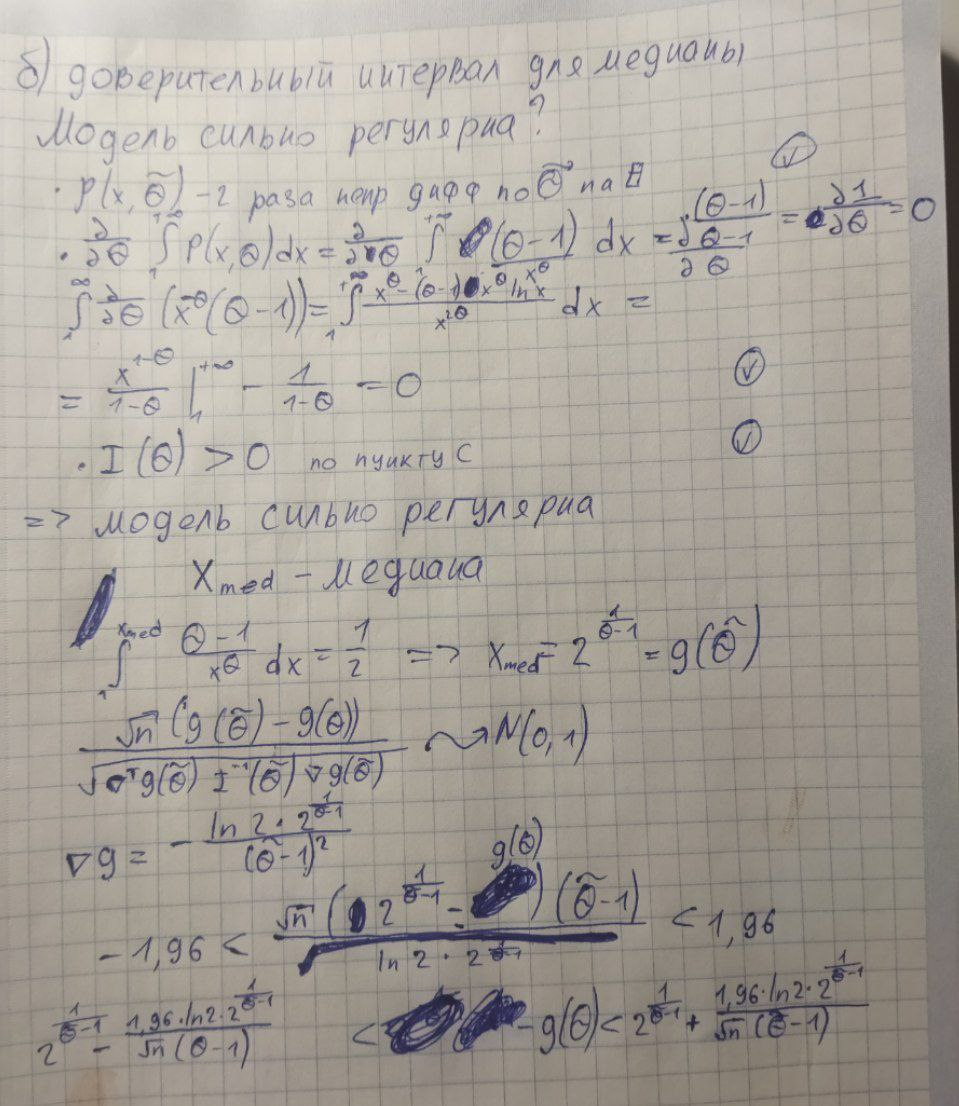

In [4]:
Image("images/photo_5406847798684545537_y.jpg")

In [24]:
# d)

import numpy as np
import random

theta = 3

def p(x):
    return (theta - 1) / x ** theta if x >= 0 else 0

def F(x):
    if x >= 0:
        return (1 - x ** (1 - theta))
    else:
        return 0

def F_reversed(y):
    return (1 - y) ** (1 / (1 - theta))

def g(theta):
    return 2 ** (1 / (theta - 1))

# здесь можно поменять размер генерируемой выборки    
n = 100
sample = []
for i in range(n):
    sample.append(float(F_reversed(random.random())))

t_1 = -1.96
t_2 = 1.96
beta = 0.95
estimation = 1 + 1 / np.mean([np.log(x) for x in sample])

l_border = g(estimation) - (t_2 * np.log(2) * g(estimation)) / ((estimation - 1) * np.sqrt(n)) 
r_border = g(estimation) - (t_1 * np.log(2) * g(estimation)) / ((estimation - 1) * np.sqrt(n)) 
print('Интервал медианы = (', l_border, ",", r_border, ')')
print('l =',  r_border - l_border)
print("Медиана =", (sorted(sample)[n//2-1] + sorted(sample)[n//2]) / 2)

l_border = estimation - ((estimation - 1) * t_2) / np.sqrt(n)
r_border = estimation -  ((estimation - 1) * t_1) / np.sqrt(n)
print('Асимптотический интервал = (', l_border, ",", r_border, ')')
print('l =',  r_border - l_border)

Интервал медианы = ( 1.3493342876721737 , 1.564166543876525 )
l = 0.21483225620435142
Медиана = 1.4439381635627433
Асимптотический интервал = ( 2.4813348425757313 , 3.2035777011449937 )
l = 0.7222428585692624


In [25]:
# t))
bst = 1000
estimation = 1 + 1 / np.mean([np.log(x) for x in sample])

delta = []
for i in range(bst):
    bst_sample = np.random.choice(sample, size=len(sample), replace=True)
    theta = 1 + 1 / np.mean([np.log(x) for x in bst_sample])
    delta.append(theta - estimation)

delta.sort()
t_1 = delta[int(bst * (1 - beta) / 2)]
t_2 = delta[int(bst * (1 + beta) / 2)]
r_border = -(t_1 - estimation)
l_border = -(t_2 - estimation)
print('Параметрический интервал = (', l_border, ",", r_border, ')')
print('l =',  r_border - l_border)

def F_reversed(y, theta_w):
    return (1 - y) ** (1 / (1 - theta_w))

bst = 50000
for i in range(bst):
    bst_sample = [F_reversed(random.random(), estimation) for _ in range(n)]
    theta = 1 + 1 / np.mean([np.log(x) for x in bst_sample])
    delta.append(theta - estimation)

delta.sort()
t_1 = delta[int(bst * (1 - beta) / 2)]
t_2 = delta[int(bst * (1 + beta) / 2)]
r_border = -(t_1 - estimation)
l_border = -(t_2 - estimation)
print('Непараметрический интервал = (', l_border, ",", r_border, ')')
print('l =',  r_border - l_border)

Параметрический интервал = ( 2.29347827442528 , 3.1971462851553696 )
l = 0.9036680107300894
Непараметрический интервал = ( 2.4789086600541896 , 3.155658093285115 )
l = 0.6767494332309254


#### h)
Интервал, полученный непараметрическим бутстрапом,оказался короче остальных, но доверительный интервал асимптотического метода получился меньше интервала, полученного методом параметрического бутстрапа. Но асимтотический метод обеспечивает точность полученных данных, в то время как бутстрап сужает интервал, жертвуя точностью